In [14]:
import numpy as np
import matplotlib.pyplot as plt
from bayesshippy import mcmcRoutines as bmcmc
import corner
import emcee

In [2]:
exampleRoot = "../"

In [3]:
dataObj = bmcmc.MCMCOutput(exampleRoot+"data/rosenbock_output.hdf5")
# dataObj = bmcmc.MCMCOutput(exampleRoot+"data/rosenbockPrior_output.hdf5")


In [9]:
data = dataObj.unpackMCMCData(betaID=0, trim=None,thin=None)
print(data.keys())

34
38
27
31
dict_keys(['logL', 'logP', 'data', 'beta'])


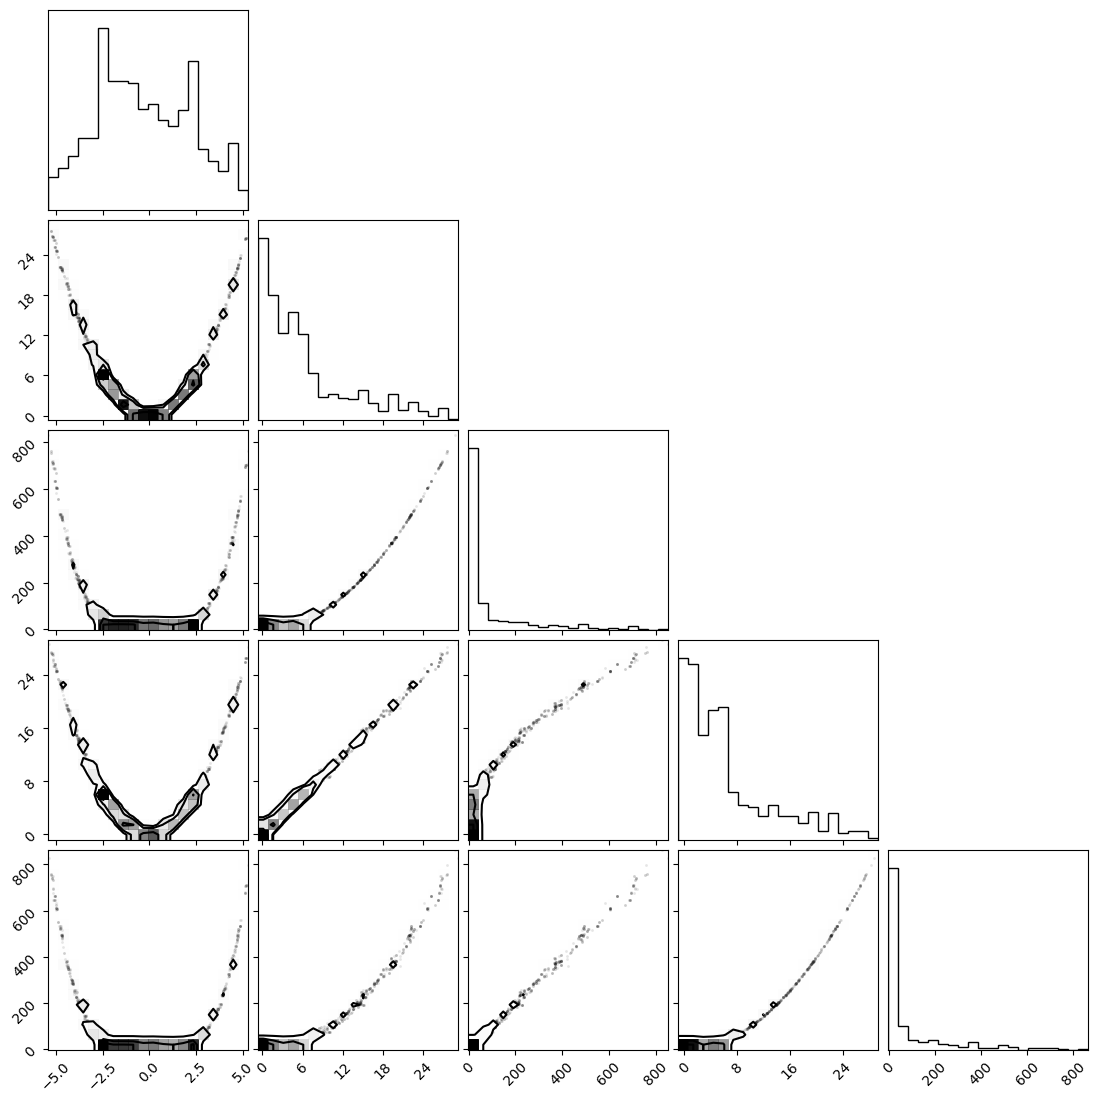

In [10]:
fig = corner.corner(data["data"])
plt.show()
plt.close()

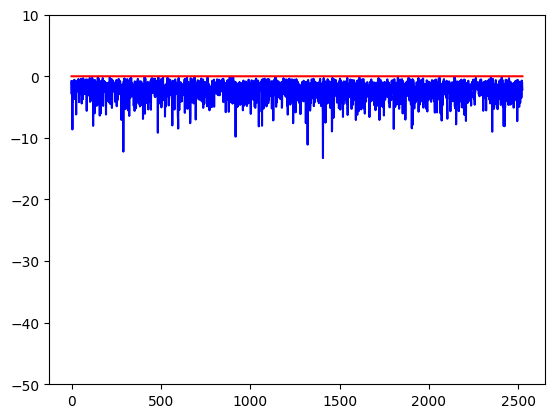

In [11]:
plt.plot(data["logL"],color='b')
plt.plot(data["logP"],color='r')
plt.ylim([-50,10])
plt.show()
plt.close()

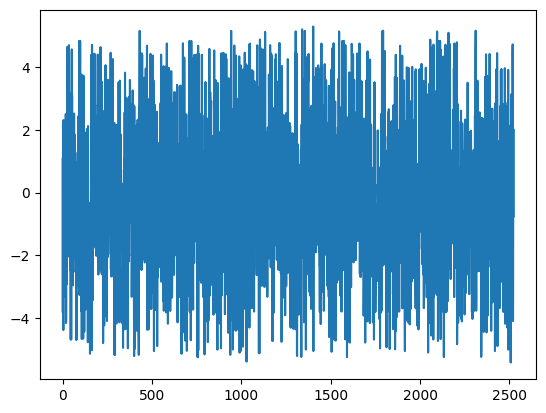

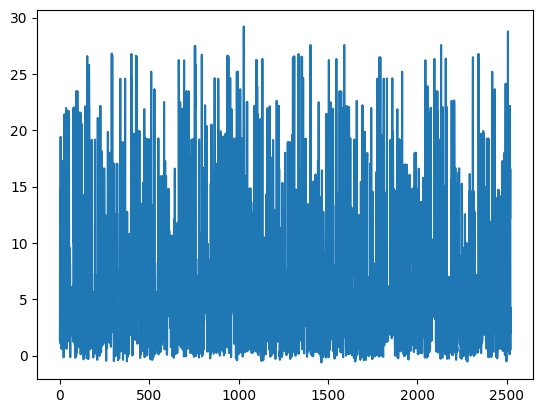

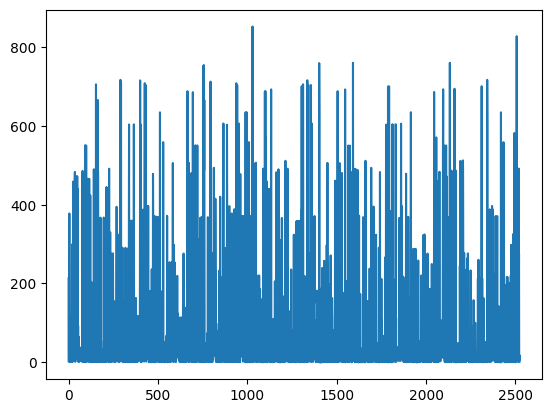

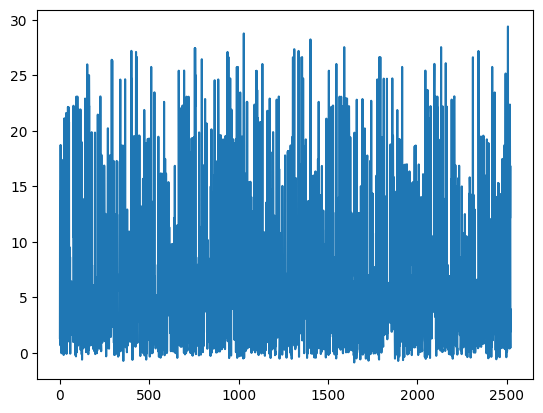

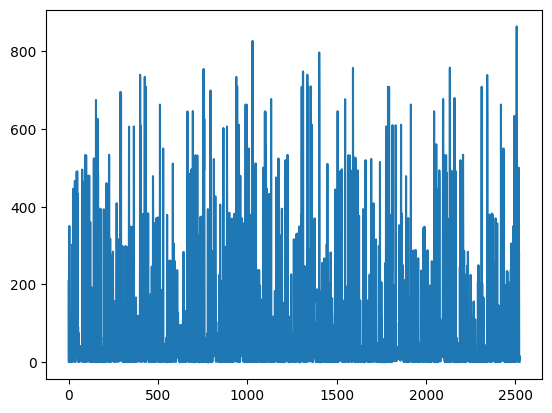

In [12]:
for x in data["data"].keys():
    plt.plot(data["data"][x])
    plt.show()
    plt.close()

[1.65174136]


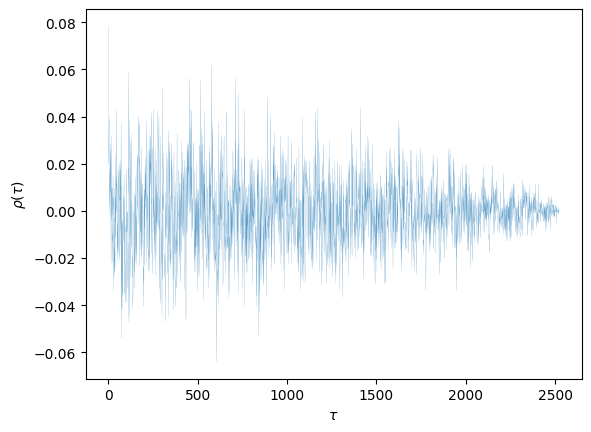

[1.21537151]


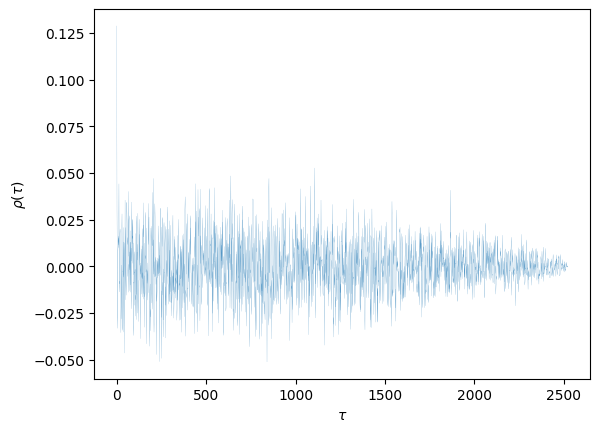

[1.16894477]


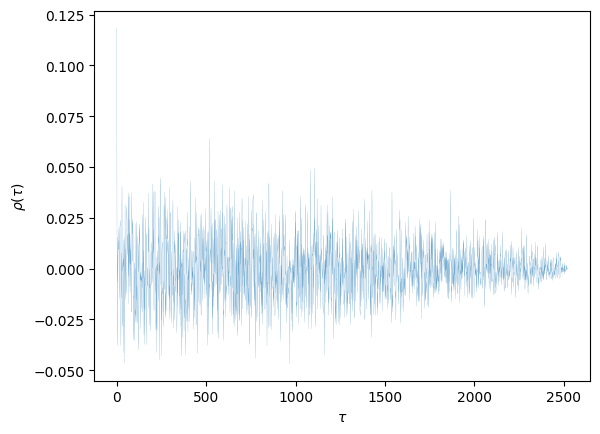

[1.18766883]


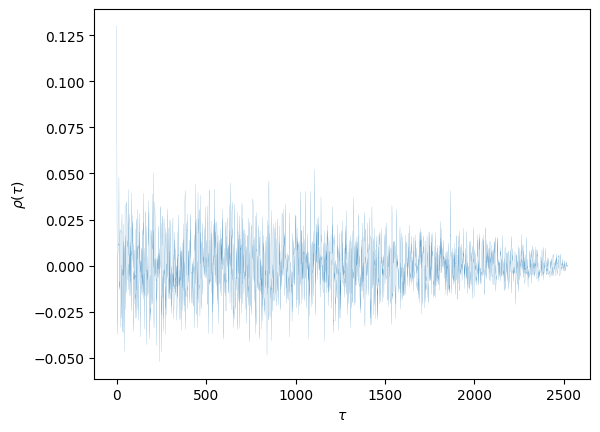

[1.16278393]


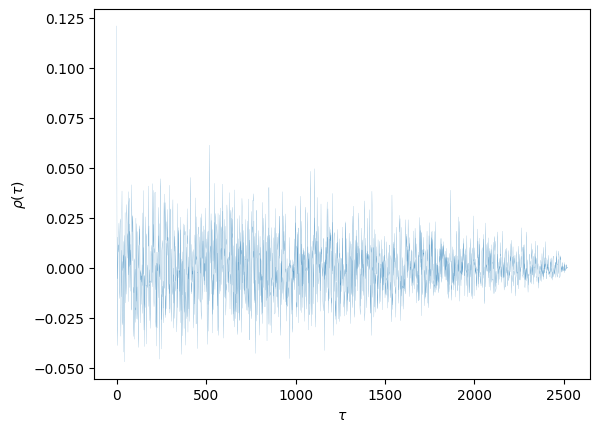

In [15]:
for i in np.arange(len(data["data"].iloc[0])):
    ac =emcee.autocorr.function_1d(data["data"].loc[:,"Parameter {}".format(i)].to_numpy() )
    # print(1+np.cumsum(ac)*2)
    TAU = emcee.autocorr.integrated_time(data["data"].loc[:,"Parameter {}".format(i)].to_numpy() )
    
    print(TAU)
    plt.plot(ac[1:],linewidth=.1)
    # plt.title(labels[i])
    plt.xlabel(r'$\tau$')
    plt.ylabel(r'$\rho(\tau)$')
    plt.show()
    plt.close()